# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [3]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [4]:
# TODO
print("The house with address " + str(ds.loc[ds["price"].idxmax()]["address"]) + " is the most expensive and its price is " + str(ds.loc[ds["price"].idxmax()]["price"]) + " USD")

The house with address El Escorial is the most expensive and its price is 8500000 USD


#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [5]:
# TODO
print("The house with address " + str(ds.loc[ds["price"].idxmin()]["address"]) + " is the cheapest and its price is " + str(ds.loc[ds["price"].idxmin()]["price"]) + " USD")

The house with address Parla is the cheapest and its price is 0 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [6]:
# TODO
print("The bigger house is located on " + str(ds.loc[ds["surface"].idxmax()]["address"]) + " and its surface is " + str(int(ds.loc[ds["surface"].idxmax()]["surface"])) + " meters")
print("The smaller house is located on " + str(ds.loc[ds["surface"].idxmin()]["address"]) + " and its surface is " + str(int(ds.loc[ds["surface"].idxmin()]["surface"])) + " meters")

The bigger house is located on Sevilla la Nueva and its surface is 249000 meters
The smaller house is located on Calle Amparo,  Madrid Capital and its surface is 15 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [7]:
# TODO
print(', '.join(ds['level5'].tolist()))

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Fuenlabrada, Arganda del Rey, Las Rozas de Madrid, Las Rozas de Madrid, Las Rozas de Madrid, Las Rozas de Madrid,  Madrid Capital,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero,  Madrid Capital,  Madrid Capital,  Madrid Capital, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes,  Madrid Capital, Rivas-vaciamadrid, Alpedrete,  Madrid Capital,  Madrid Capital,  Madrid Capital, Móstoles,  Madrid Capital,  Madrid Capital,  Madrid Capital, San Fernando de Henares, Coslada,  Madrid Capital, Becerril de la Sierra,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital, Alcalá de Henares,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital,  Madrid Capital, Pinto,  Madrid Capital,  Madrid Capital,

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [8]:
# TODO
print("Rows and Columns with NA values:")
for i in ds.isnull():
    if ds.isnull()[i].any():
            print(f"Column {i} has NA values in {len(ds.isnull()[i][ds.isnull()[i]].index.tolist())} of its rows")


Rows and Columns with NA values:
Column realEstate_name has NA values in 10 of its rows
Column phone_realEstate has NA values in 794 of its rows
Column rooms has NA values in 353 of its rows
Column bathrooms has NA values in 345 of its rows
Column surface has NA values in 1250 of its rows
Column description has NA values in 142 of its rows
Column level4 has NA values in 6643 of its rows
Column level6 has NA values in 14627 of its rows
Column level7 has NA values in 2277 of its rows
Column level8 has NA values in 8579 of its rows
Column zipCode has NA values in 15335 of its rows
Column customZone has NA values in 15335 of its rows


#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [9]:
# TODO
dsna = ds.dropna()

#Comparison
print("The shape of the Data Frame with na values is " + str(ds.shape[0]) + " by " + str(ds.shape[1]))
print("The shape of the Data Frame without na values is " + str(dsna.shape[0]) + " by " + str(dsna.shape[1]))

The shape of the Data Frame with na values is 15335 by 37
The shape of the Data Frame without na values is 0 by 37


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [10]:
# TODO
print("The mean price of Arroyomolinos (Madrid) is " + str(round((ds[ds["level5"] == "Arroyomolinos (Madrid)"]["price"].mean()),2)))

The mean price of Arroyomolinos (Madrid) is 294541.6


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  1.,  0.,  3.,  5.,
         7.,  1.,  5.,  9.,  3.,  0.,  7.,  2.,  1.,  3., 15.,  2.,  4.,
         4.,  5.,  0.,  9.,  8.,  3.,  8.,  5.,  4.,  3.,  4.,  3.,  1.,
         0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([     0.        ,   7733.33333333,  15466.66666667,  23200.        ,
         30933.33333333,  38666.66666667,  46400.        ,  54133.33333333,
         61866.66666667,  69600.        ,  77333.33333333,  85066.66666667,
         92800.        , 100533.33333333, 108266.66666667, 116000.        ,
        123733.33333333, 131466.66666667, 139200.        , 146933.33333333,
        154666.66666667, 162400.        , 170133.33333333, 177866.66666667,
        185600.        , 193333.33333333, 201066.66666667, 208800.        ,
        216533.33333333, 224266.66666667, 2

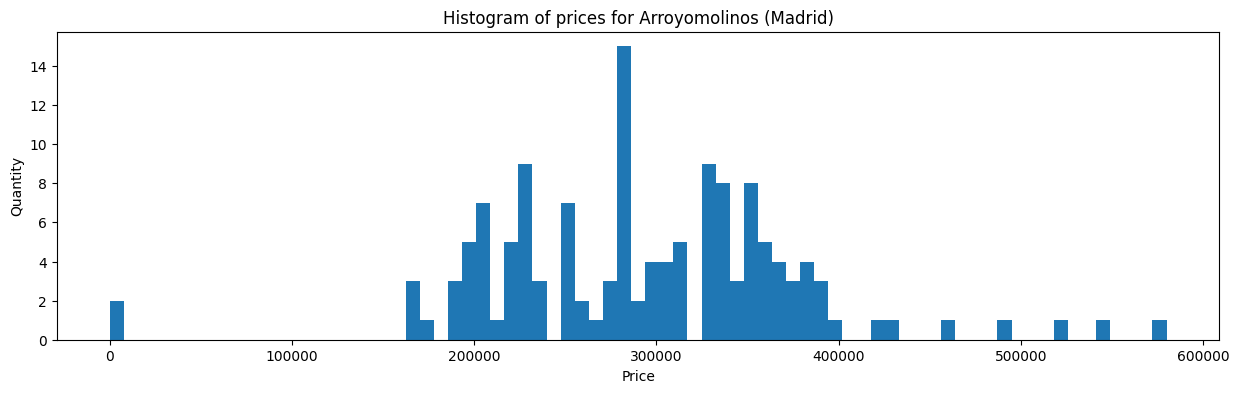

In [11]:
# TODO: Code
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.title("Histogram of prices for Arroyomolinos (Madrid)")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.hist(ds[ds["level5"] == "Arroyomolinos (Madrid)"]["price"],bins = 75)

Conclusions:
Prices for Arroyomolinos (Madrid) shown in the graphic seem to be slightly skewed to the left, with very few places costing less than 200.000 USD. The price of the average price was 294.541 USD, this is also reflected in the graphic. Finally, house prices in Arroyomolinos are shown to range from about 180.000 USD to 400.000 USD.

#### Exercise 09. Are the averages of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

The average price for Valdemorillo is: 363860.29
The average price for Galapagar is: 360063.2


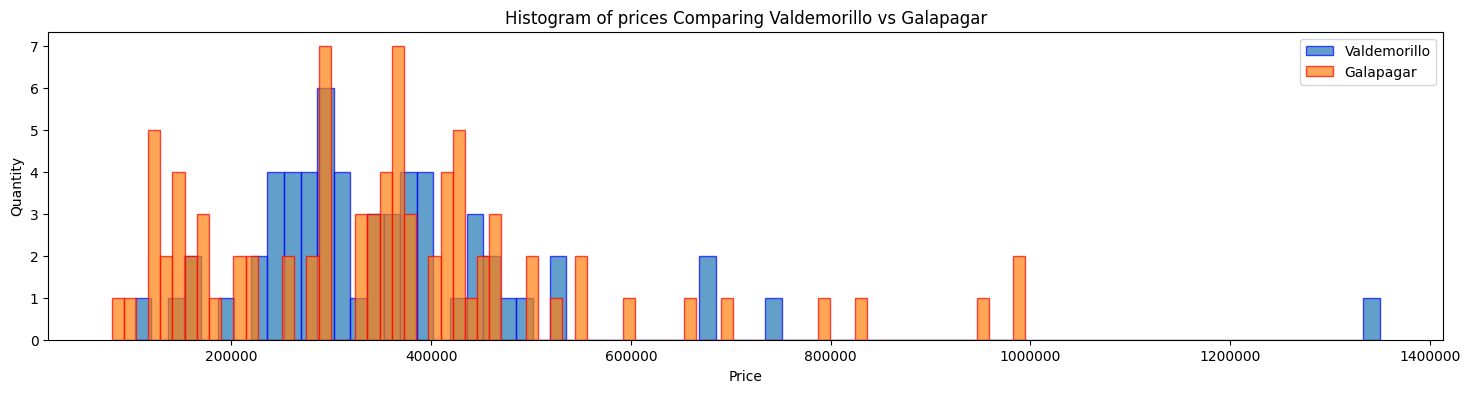

In [12]:
# TODO
print("The average price for Valdemorillo is: "+ str(round(ds[ds["level5"]== "Valdemorillo"]["price"].mean(),2)))
print("The average price for Galapagar is: "+ str(round(ds[ds["level5"]== "Galapagar"]["price"].mean(),2)))

plt.figure(figsize=(18,4))
plt.title("Histogram of prices Comparing Valdemorillo vs Galapagar")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.ticklabel_format(style='plain')
plt.hist(ds[ds["level5"] == "Valdemorillo"]["price"], label= "Valdemorillo", alpha = .7,bins = 75, edgecolor = "blue")
plt.hist(ds[ds["level5"] == "Galapagar"]["price"], label= "Galapagar", alpha = .7,bins = 75, edgecolor="red")
plt.legend()

Conclusion:
Prices in Valdemorillo and Galapagar appear to be very similar. Although there seems to be a better chance to find houses in Galapagar for less than 200.000 USD. Data from Valdemorillo suggests that its prices tipically range from around 200.000 USD to 500.000 USDm while in Galapagar prices seem to be more spread out.

#### Exercise 10. Are the averages of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [13]:
# TODO
ds["pps"] = ds.price / ds.surface

The average square meter price for Valdemorillo is: 1317.95
The average square meter price for Galapagar is: 1606.32


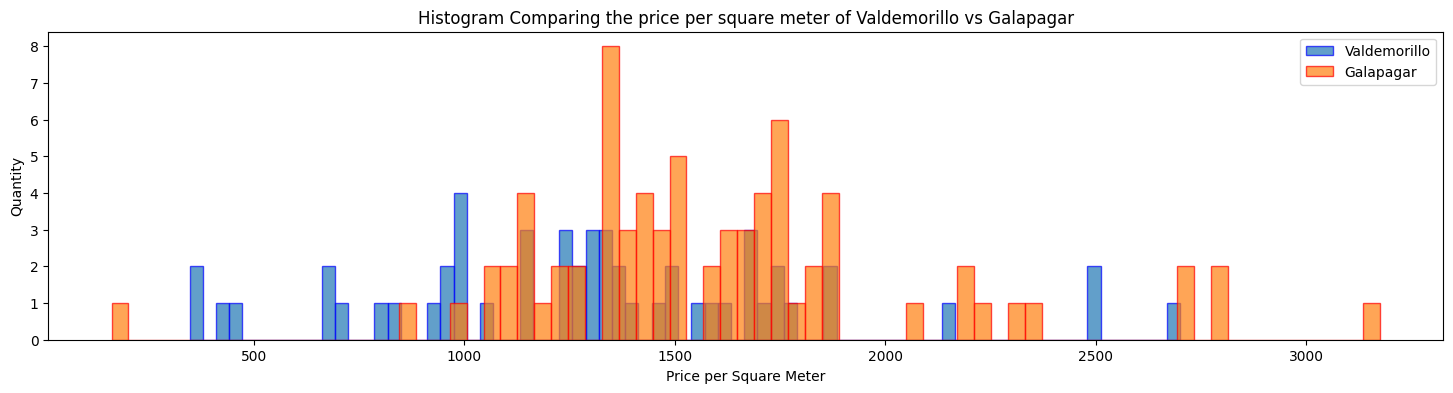

In [14]:
print("The average square meter price for Valdemorillo is: "+ str(round(ds[ds["level5"]== "Valdemorillo"]["pps"].mean(),2)))
print("The average square meter price for Galapagar is: "+ str(round(ds[ds["level5"]== "Galapagar"]["pps"].mean(),2)))

plt.figure(figsize=(18,4))
plt.title("Histogram Comparing the price per square meter of Valdemorillo vs Galapagar")
plt.xlabel("Price per Square Meter")
plt.ylabel("Quantity")
plt.ticklabel_format(style='plain')
plt.hist(ds[ds["level5"] == "Valdemorillo"]["pps"], label= "Valdemorillo", alpha = .7,bins = 75, edgecolor = "blue")
plt.hist(ds[ds["level5"] == "Galapagar"]["pps"], label= "Galapagar", alpha = .7,bins = 75, edgecolor="red")
plt.legend()

Conclusion: 
Even though the average prices are very similar, price per square meter in Valdemorillo an Galapagar are significantly different. Meaning that if you buy a house in Valdemorillo you can get a bigger house (on average) for the same price than if you buy a house with a similar price in Galapagar.

#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

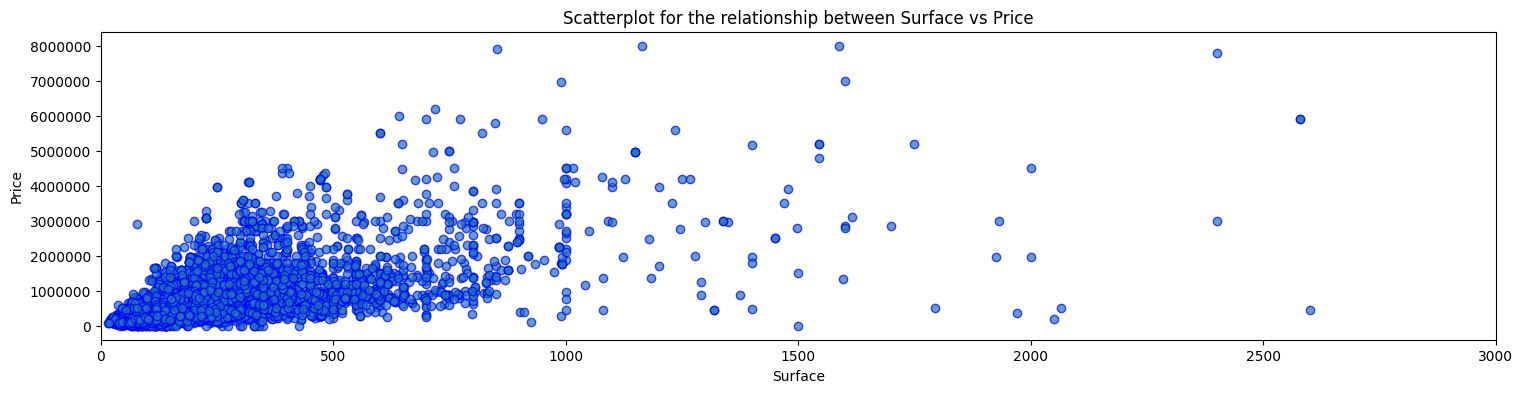

In [15]:
# TODO: Code
plt.figure(figsize=(18,4))
plt.title("Scatterplot for the relationship between Surface vs Price")
plt.xlabel("Surface")
plt.xlim(0, 3000) #<-- I limited the Surface to 3000 because most of the sample was concentrated in lower values.
plt.ylabel("Price")
plt.ticklabel_format(style='plain')
plt.scatter(ds["surface"], ds["price"], alpha = .7, edgecolor = "blue")


Conclusion:
There seems to be a linear correlation between both variables. Most properties are listed below 1000mt2 and have a lower price than 400-500k USD in total. Outliers were present, specially in the Surface scale, but since most of the sample was concentrated in values lower than 3.000mt2 I took them out of the scatterplot.

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [16]:
# TODO
print("This Data set contains " + str(len(ds.id_realEstates.unique())) + " Real Estate Agencies unique IDs")
print("This Data set contains " + str(len(ds.realEstate_name.unique())) + " Unique Real Estate Agencies names")


This Data set contains 14217 Real Estate Agencies unique IDs
This Data set contains 1822 Unique Real Estate Agencies names


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [17]:
# TODO
print("The population that contains the greatest number of listed houses is" + str(ds["level5"].value_counts().idxmax()) + " and has " + str(ds["level5"].value_counts().max()) + " listed")

The population that contains the greatest number of listed houses is Madrid Capital and has 6643 listed


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [18]:
# TODO
ds[ds["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,pps
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,1034.883721
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN,2140.000000
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN,2666.666667
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN,2992.957746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN,1769.230769
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN,2536.363636
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN,2000.000000
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN,1230.769231


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

<BarContainer object of 4 artists>

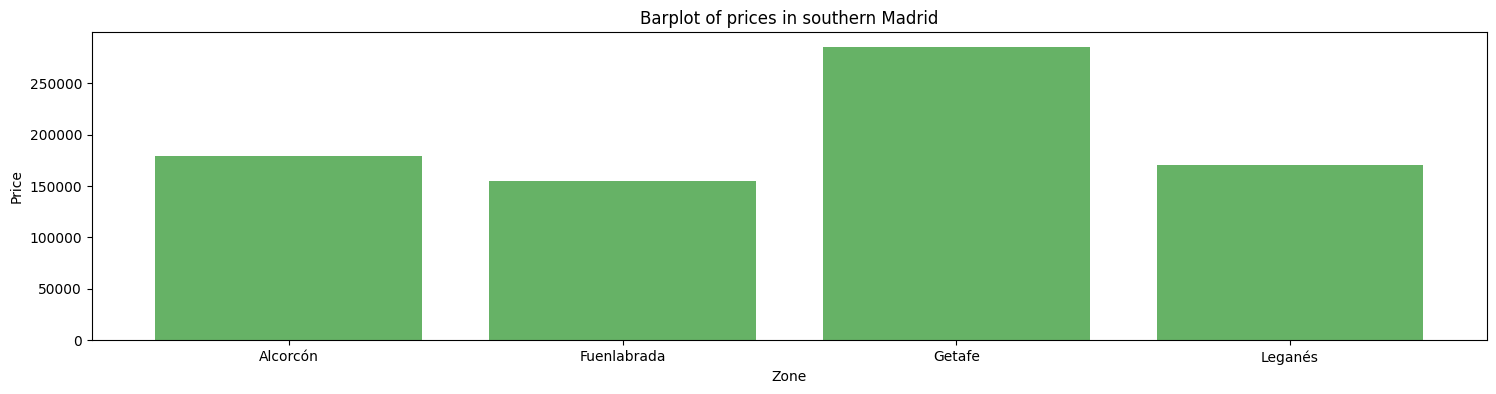

In [19]:
# TODO: Code
ds_ex15 = ds[ds["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]
zones = ds_ex15.groupby('level5')['price'].median().index
prices = ds_ex15.groupby('level5')['price'].median().values

plt.figure(figsize=(18,4))
plt.title("Barplot of prices in southern Madrid")
plt.xlabel("Zone")
plt.ylabel("Price")
plt.ticklabel_format(style='plain')
plt.bar(zones, prices, color='green', alpha=0.6) 

Conclusion:
The median price for a property in Getafe seems to be significantly higher than the rest of the southern zones of Madrid. Alcorcón, Leganés and Fuenlabrada (highest to lowest) have a more similar median price.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [20]:
# TODO
print("The sample's mean and variance scores for price was " + str(round(ds_ex15["price"].mean(),2)) + " and " + str(round(ds_ex15["price"].var(),2)) + " respectively.")
print("The sample's mean and variance scores for rooms was " + str(round(ds_ex15["rooms"].mean(),2)) + " and " + str(round(ds_ex15["rooms"].var(),2)) + " respectively.")
print("The sample's mean and variance scores for surface area was " + str(round(ds_ex15["surface"].mean(),2)) + " and " + str(round(ds_ex15["surface"].var(),2)) + " respectively.")
print("The sample's mean and variance scores for bathrooms was " + str(round(ds_ex15["bathrooms"].mean(),2)) + " and " + str(round(ds_ex15["bathrooms"].var(),2)) + " respectively.")

The sample's mean and variance scores for price was 223094.48 and 14921367508.05 respectively.
The sample's mean and variance scores for rooms was 3.02 and 0.72 respectively.
The sample's mean and variance scores for surface area was 111.75 and 4263.05 respectively.
The sample's mean and variance scores for bathrooms was 1.63 and 0.57 respectively.


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [21]:
# TODO
for i in ds_ex15["level5"].unique():
    subset = ds_ex15[ds_ex15["level5"] == i]
    max_price_idx = subset["price"].idxmax()
    
    max_address = subset.loc[max_price_idx]["address"]
    max_price = subset["price"].max()
    print(f"The address for the highest priced property in {i} is {max_address} and its price is {max_price} USD.")

The address for the highest priced property in Fuenlabrada is Calle de Paulo Freire, 5, Fuenlabrada and its price is 490000 USD.
The address for the highest priced property in Alcorcón is Alcorcón and its price is 950000 USD.
The address for the highest priced property in Leganés is Avenida Reina Sofía, Leganés and its price is 650000 USD.
The address for the highest priced property in Getafe is Getafe and its price is 1050000 USD.


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

/tmp/ipykernel_59525/1000503544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_ex15["Normalized Price"] = (ds_ex15['price'] - ds_ex15['price'].min()) / (ds_ex15['price'].max() - ds_ex15['price'].min())


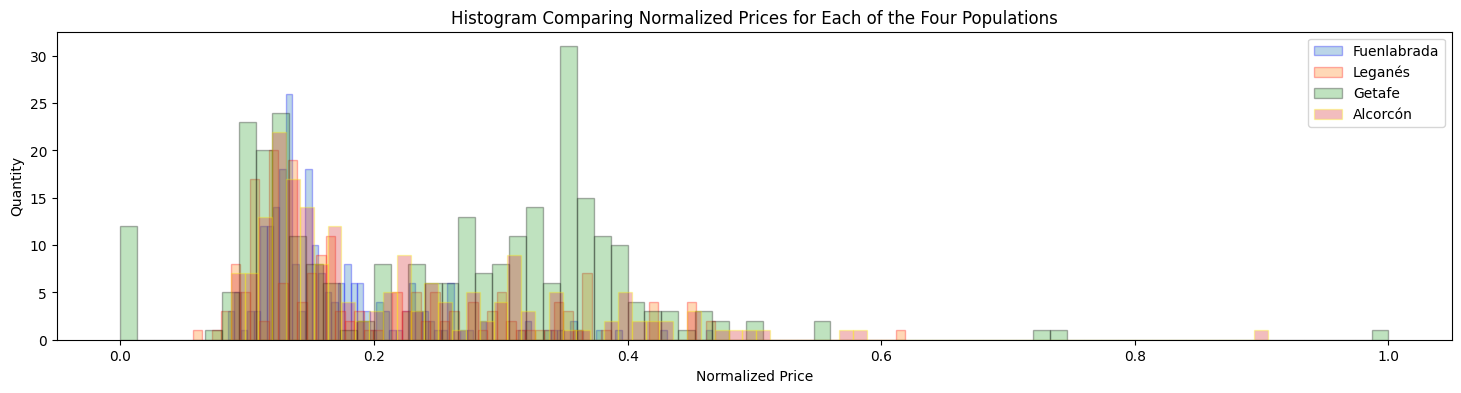

In [22]:
# TODO
#Min Max Normalization
ds_ex15["Normalized Price"] = (ds_ex15['price'] - ds_ex15['price'].min()) / (ds_ex15['price'].max() - ds_ex15['price'].min())

plt.figure(figsize=(18,4))
plt.title("Histogram Comparing Normalized Prices for Each of the Four Populations")
plt.xlabel("Normalized Price")
plt.ylabel("Quantity")
plt.ticklabel_format(style='plain')
plt.hist(ds_ex15[ds_ex15["level5"] == "Fuenlabrada"]["Normalized Price"], label= "Fuenlabrada", alpha = .3,bins = 75, edgecolor = "blue")
plt.hist(ds_ex15[ds_ex15["level5"] == "Leganés"]["Normalized Price"], label= "Leganés", alpha = .3,bins = 75, edgecolor="red")
plt.hist(ds_ex15[ds_ex15["level5"] == "Getafe"]["Normalized Price"], label= "Getafe", alpha = .3,bins = 75, edgecolor = "black")
plt.hist(ds_ex15[ds_ex15["level5"] == "Alcorcón"]["Normalized Price"], label= "Alcorcón", alpha = .3,bins = 75, edgecolor = "yellow")
plt.legend()

Conclusion:
As stated before, Getafe is has the most ammount of high value properties, while the trend seems to be more similar between the other 3 locations.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

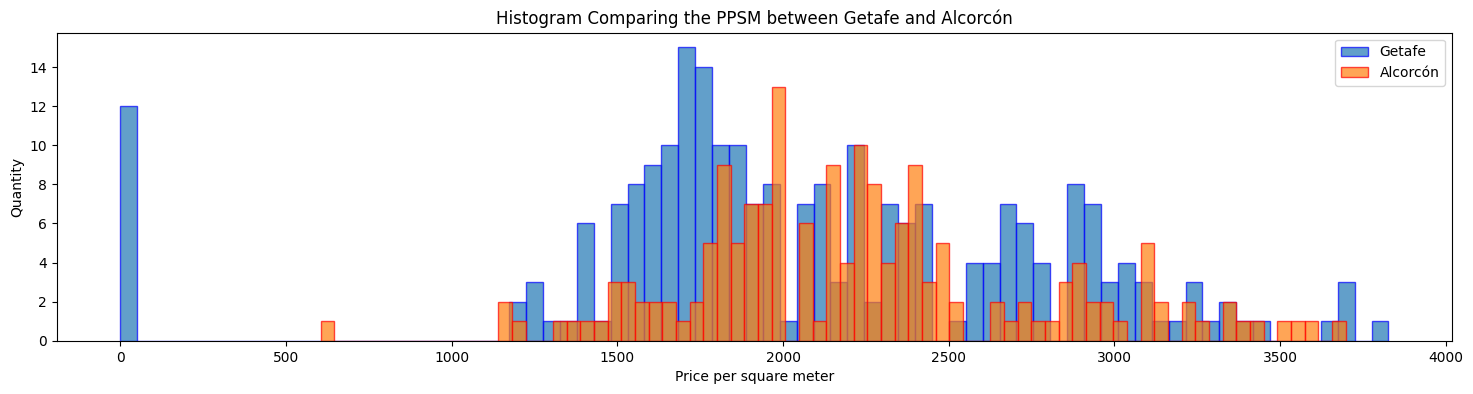

In [23]:
# TODO
plt.figure(figsize=(18,4))
plt.title("Histogram Comparing the PPSM between Getafe and Alcorcón")
plt.xlabel("Price per square meter")
plt.ylabel("Quantity")
plt.ticklabel_format(style='plain')
plt.hist(ds_ex15[ds_ex15["level5"] == "Getafe"]["pps"], label= "Getafe", alpha = .7,bins = 75, edgecolor = "blue")
plt.hist(ds_ex15[ds_ex15["level5"] == "Alcorcón"]["pps"], label= "Alcorcón", alpha = .7,bins = 75, edgecolor="red")
plt.legend()

Conclusions:
Compared to Alcorcón, Getafe's prices per square meter in average are very similar. Nontheless, it has a higher quantity of  properties in lower PPSM prices.

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

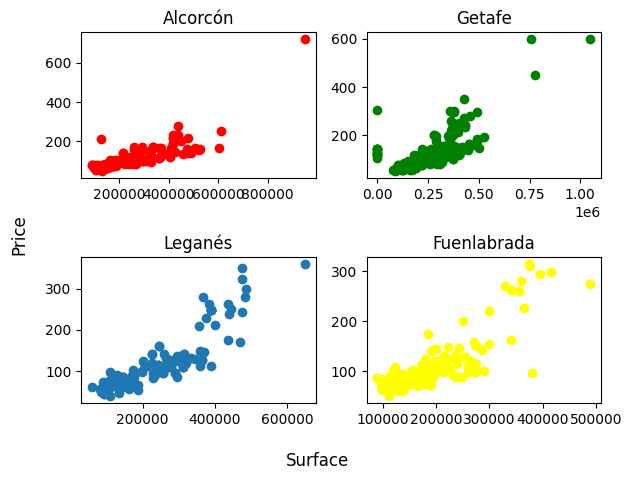

In [24]:
# TODO
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(ds_ex15[ds_ex15["level5"] == "Alcorcón"]["price"], ds_ex15[ds_ex15["level5"] == "Alcorcón"]["surface"], color = "red")
axs[0,0].set_title("Alcorcón")
axs[0,1].scatter(ds_ex15[ds_ex15["level5"] == "Getafe"]["price"], ds_ex15[ds_ex15["level5"] == "Getafe"]["surface"], color= "green")
axs[0,1].set_title("Getafe")
axs[1,0].scatter(ds_ex15[ds_ex15["level5"] == "Leganés"]["price"], ds_ex15[ds_ex15["level5"] == "Leganés"]["surface"])
axs[1,0].set_title("Leganés")
axs[1,1].scatter(ds_ex15[ds_ex15["level5"] == "Fuenlabrada"]["price"], ds_ex15[ds_ex15["level5"] == "Fuenlabrada"]["surface"], color = "yellow")
axs[1,1].set_title("Fuenlabrada")
fig.supxlabel("Surface")
fig.supylabel("Price")
fig.tight_layout()


#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [25]:
from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center=(60, -2.2), zoom=2, min_zoom=1, max_zoom=20, basemap=basemaps.Stadia.StamenTerrain) #"Stamen.Terrain" was deprecated, had to change it to "".Stadia.StamenTerrain"
map


Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [26]:
## HERE: plot the coordinates of the estates
#ds_ex15[["latitude", "longitude"]]

positions = {"latitude": ds_ex15["latitude"],
             "longitude": ds_ex15["longitude"],
             "population": ds_ex15["level5"]
             }
positions = pd.DataFrame(positions)

#Latitudes and Longitudes decimals were separated by commas, I had to change them to decimal points.
positions['latitude'] = positions['latitude'].str.replace(',', '.').astype(float)
positions['longitude'] = positions['longitude'].str.replace(',', '.').astype(float)

#I have taken the liberty to center the map in Madrid
map = Map(center=(40.3168, -3.7943), zoom=11, min_zoom=1, max_zoom=20, basemap=basemaps.Stadia.StamenTerrain)

## PUT HERE YOUR CODE:

from ipyleaflet import CircleMarker, LayerGroup, LegendControl

colors = {"Fuenlabrada": "red", "Leganés": "green", "Getafe": "blue", "Alcorcón": "yellow"}
layer_group = LayerGroup()

for row in positions.index:
    #print(f"Adding marker for {row['population']} at ({row['latitude']}, {row['longitude']})")
    mark = CircleMarker()
    mark.location = (positions.loc[row]["latitude"],positions.loc[row]["longitude"])
    mark.radius = 3
    mark.color = colors.get(positions.loc[row]["population"], "black")
    mark.fill_color = colors.get(positions.loc[row]["population"], "black")
    mark.weight = 1
    layer_group.add_layer(mark)

legend = LegendControl(colors, title="Populations", position="topright")
map.add(legend)
map.add_layer(layer_group)
map

Map(center=[40.3168, -3.7943], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…